In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from datetime import datetime
import pylab
import scipy.stats
sns.set()
%matplotlib inline

In [2]:
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load original dataset with correct encoding
data = pd.read_csv(r"C:\Users\Maaz\Downloads\FastFashionApparel.csv", encoding='latin1')

# Define fast fashion brands (case-insensitive)
fast_fashion_brands = ['Zara', 'H&M', 'Forever 21', 'American Eagle', 'ASOS', 'Urban Outfitters']

# Drop rows where brand_name is missing
data = data.dropna(subset=['brand_name'])

# Filter only fast fashion brands
data = data[data['brand_name'].str.lower().isin([b.lower() for b in fast_fashion_brands])]

# Reset index after filtering
data.reset_index(drop=True, inplace=True)

# Save it permanently by overwriting the same CSV (⚠️ this will replace the original file)
data.to_csv(r"C:\Users\Maaz\Downloads\FastFashionApparel.csv", index=False)

# Optional: print confirmation and preview
("Filtered dataset saved permanently.")
data.head()



,Id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,5,FREESHIP summer navyblue floral sundress,2,"Women/Dresses/Above Knee, Mini",FOREVER 21,13.0,1,-size small no padding (wear a padded bra if u...
1,6,Brand New With Tag American Eagle Romper,1,Women/Dresses/Other,American Eagle,20.0,1,"Brand new, originally spent [rm]. Dark charcoa..."
2,28,NWT Flat lace O' dorsay shoes!,1,Women/Shoes/Flats,ZARA,46.0,0,ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...
3,82,Forever 21 Strapless Mini Dress- Size M,3,"Women/Dresses/Above Knee, Mini",FOREVER 21,10.0,1,Super cute floral printed mini dress! The tag ...
4,119,Floral Crop Top,2,Women/Tops & Blouses/T-Shirts,H&M,12.0,0,Never worn


In [4]:
data.to_csv("fast_fashion_only.csv", index=False)
data.head(5)

,Id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,5,FREESHIP summer navyblue floral sundress,2,"Women/Dresses/Above Knee, Mini",FOREVER 21,13.0,1,-size small no padding (wear a padded bra if u...
1,6,Brand New With Tag American Eagle Romper,1,Women/Dresses/Other,American Eagle,20.0,1,"Brand new, originally spent [rm]. Dark charcoa..."
2,28,NWT Flat lace O' dorsay shoes!,1,Women/Shoes/Flats,ZARA,46.0,0,ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...
3,82,Forever 21 Strapless Mini Dress- Size M,3,"Women/Dresses/Above Knee, Mini",FOREVER 21,10.0,1,Super cute floral printed mini dress! The tag ...
4,119,Floral Crop Top,2,Women/Tops & Blouses/T-Shirts,H&M,12.0,0,Never worn


In [5]:
data.tail(4)

,Id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
3651,148063,NWT F21 Panties,1,Women/Underwear/Panties,FOREVER 21,13.0,0,New With Tags Forever 21 panties. There pair i...
3652,148073,Black off the shoulder bodysuit!!,2,"Women/Tops & Blouses/Tank, Cami",FOREVER 21,22.0,1,So so cute with a strappy back detail. Unfortu...
3653,148174,Hot pink bralette,2,Women/Underwear/Bras,American Eagle,24.0,0,Hot pink lace bralette from Aerie it is a size...
3654,148200,Forever 21 black flats,1,Women/Shoes/Flats,FOREVER 21,16.0,0,Didn't fit me original price was 17.50!plus wh...


In [6]:
data.describe()

,Id,item_condition_id,price,shipping
count,3655.000000,3655.000000,3655.000000,3655.000000
mean,73150.585226,2.230369,15.119425,0.328044
std,43293.910090,0.753396,10.192055,0.469565
min,5.000000,1.000000,0.000000,0.000000
25%,34280.000000,2.000000,10.000000,0.000000
50%,72793.000000,2.000000,13.000000,0.000000
75%,111680.500000,3.000000,18.000000,1.000000
max,148200.000000,4.000000,186.000000,1.000000


In [7]:
data.shape

(3655, 8)

In [8]:
data.dtypes

Id                     int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [9]:
data.columns

Index(['Id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [10]:
data.isna().sum()

Id                    0
name                  0
item_condition_id     0
category_name        26
brand_name            0
price                 0
shipping              0
item_description      0
dtype: int64

In [11]:
data.head()

,Id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,5,FREESHIP summer navyblue floral sundress,2,"Women/Dresses/Above Knee, Mini",FOREVER 21,13.0,1,-size small no padding (wear a padded bra if u...
1,6,Brand New With Tag American Eagle Romper,1,Women/Dresses/Other,American Eagle,20.0,1,"Brand new, originally spent [rm]. Dark charcoa..."
2,28,NWT Flat lace O' dorsay shoes!,1,Women/Shoes/Flats,ZARA,46.0,0,ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...
3,82,Forever 21 Strapless Mini Dress- Size M,3,"Women/Dresses/Above Knee, Mini",FOREVER 21,10.0,1,Super cute floral printed mini dress! The tag ...
4,119,Floral Crop Top,2,Women/Tops & Blouses/T-Shirts,H&M,12.0,0,Never worn


In [12]:
dates = pd.date_range(start='2023-10-01', periods=365, freq='D')
daily_demand = pd.DataFrame({
    'date': dates,
    'demand': np.random.poisson(lam=5, size=len(dates))
})
daily_demand.set_index('date', inplace=True)

In [13]:
daily_demand

,demand
date,
2023-10-01,4
2023-10-02,4
2023-10-03,7
2023-10-04,8
2023-10-05,6
...,...
2024-09-25,3
2024-09-26,3
2024-09-27,5


In [26]:
# ---- STEP 2: ARIMA MODEL ----
from statsmodels.tsa.arima.model import ARIMA  # Use ARIMA instead of ARMA
from scipy.stats import chi2


model = ARIMA(daily_demand['demand'], order=(4, 0, 1))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                  365
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -818.336
Date:                Fri, 16 May 2025   AIC                           1650.673
Time:                        19:17:27   BIC                           1677.972
Sample:                    10-01-2023   HQIC                          1661.522
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1570      0.135     38.283      0.000       4.893       5.421
ar.L1         -0.0284      0.534     -0.053      0.958      -1.074       1.017
ar.L2          0.0296      0.060      0.497      0.619      -0.087       0.146
ar.L3         -0.0175      0.055     -0.320      0.749      -0.125       0.090
ar.L4          0.1004      0.053      1.901      0.057      -0.003       0.204
ma.L1         -0.0055      0.535     -0.010      0.992      -1.055       1.044
sigma2         5.1863      0.471     11.013      0.000       4.263       6.109
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.82
Prob(Q):                              1.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.04   Skew:                             0.24
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

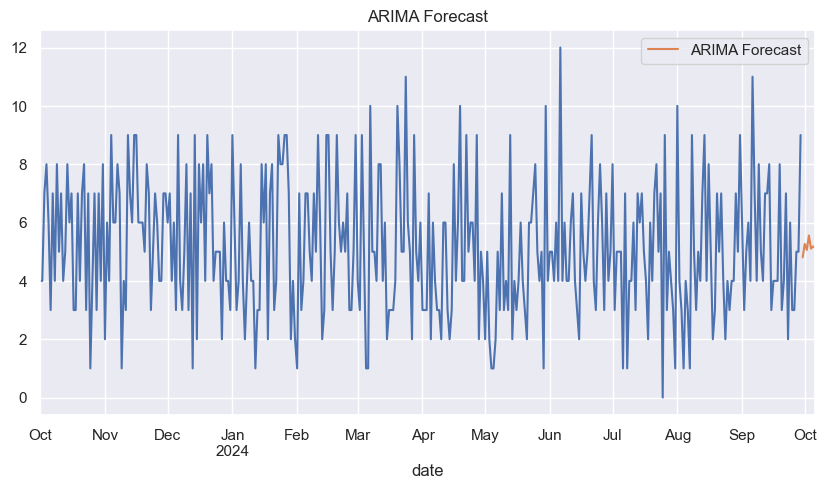

In [27]:
# Forecast next 7 days
forecast = results.forecast(steps=7)
daily_demand['demand'].plot(label='Observed', figsize=(10, 5))
forecast.plot(label='ARIMA Forecast', legend=True)
plt.title("ARIMA Forecast")
plt.show()

In [30]:
#Warning for tenserflow libraries 
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow import keras

# Function to create sequences for LSTM input
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

# Assuming daily_demand is your DataFrame and it has a 'demand' column
# Example: daily_demand = pd.read_csv('your_file.csv')

# Preprocess data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(daily_demand[['demand']])

# Split into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]  # overlap 60 for sequences

seq_length = 60
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape for LSTM input: (samples, timesteps, features)
x_train = x_train.reshape((x_train.shape[0], seq_length, 1))
x_test = x_test.reshape((x_test.shape[0], seq_length, 1))

# Build the LSTM model
model_lstm = Sequential([
    LSTM(50, return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

model_lstm.summary()

model_lstm.compile(optimizer="adam",
                   loss="mae",
                   metrics=[keras.metrics.RootMeanSquaredError()])

# Train the model
model_lstm.fit(x_train, y_train, epochs=50, batch_size=16, verbose=1)




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7833 - root_mean_squared_error: 0.9513
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8641 - root_mean_squared_error: 1.0728
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8268 - root_mean_squared_error: 1.0250
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8420 - root_mean_squared_error: 1.0162
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.7934 - root_mean_squared_error: 0.9821
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8710 - root_mean_squared_error: 1.0562
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7933 - root_mean_squared_error: 0.9833
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8372 - root_mean_squared_error: 1.0489
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8150 - root_mean_squared_error: 0.9953
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8020 - root_mean_squared_error: 0.9943

In [18]:
predictions = model_lstm.predict(x_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step


In [19]:
# ---- STEP 4: LSTM + TREND (Multiscale) ----
decomp = seasonal_decompose(daily_demand['demand'], model='additive', period=7)
trend = decomp.trend.dropna().copy()


from scipy.signal import savgol_filter

trend = savgol_filter(daily_demand['demand'], window_length=21, polyorder=2)
scaler_trend = StandardScaler()
scaled_trend = scaler_trend.fit_transform(trend.reshape(-1, 1))

model_trend = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])
model_trend.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

model_trend.summary()

x_trend, y_trend = create_sequences(scaled_trend, seq_length)

# Now x_trend shape is (samples, seq_length, 1), reshape accordingly
x_trend = x_trend.reshape((x_trend.shape[0], x_trend.shape[1], 1))

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

model_trend.fit(x_trend, y_trend,
                validation_split=0.2,
                epochs=50,
                batch_size=16,
                verbose=1,
                callbacks=[es])


# Forecast last 7 days from last trend sequence
trend_preds = model_trend.predict(x_trend[-7:].reshape(7, seq_length, 1))
trend_preds = scaler_trend.inverse_transform(trend_preds).flatten()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 0.9229 - root_mean_squared_error: 0.9568 - val_loss: 0.7191 - val_root_mean_squared_error: 0.8480
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.6067 - root_mean_squared_error: 0.7781 - val_loss: 0.4988 - val_root_mean_squared_error: 0.7062
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.5056 - root_mean_squared_error: 0.7074 - val_loss: 0.3661 - val_root_mean_squared_error: 0.6050
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.3275 - root_mean_squared_error: 0.5703 - val_loss: 0.2786 - val_root_mean_squared_error: 0.5278
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.2929 - root_mean_squared_error: 0.5407 - val_loss: 0.2465 - val_root_mean_squared_error: 0.4965
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.2320 - root_mean_squared_error: 0.4813 - val_loss: 0.2175 - val_root_mean_squared_error: 0.4663
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - los

In [29]:
# Align all to 7-day forecast horizon
actual_trend = trend[-7:]
lstm_7 = predictions[-7:]
arima_7 = forecast  # 7 values
trend_7 = trend  # 7 values


# Evaluate RMSE for 7-day comparison
from sklearn.metrics import mean_squared_error
print("RMSE (7-day):")
print(f"ARIMA: {mean_squared_error(actual_7, arima_7, squared=False):.2f}")
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f"LSTM: {rmse:.2f}")

# Evaluate
rmse = np.sqrt(mean_squared_error(actual_trend, trend_preds))
print(f"LSTM + Trend {rmse:.2f}")


RMSE (7-day):
ARIMA: 2.21
LSTM: 2.00
LSTM + Trend 1.02


In [21]:
# Extract the last part of the category path (e.g., 'T-Shirts' from 'Women/Tops & Blouses/T-Shirts')
data['main_category'] = data['category_name'].apply(lambda x: str(x).split('/')[-1])

# Simulated demand count by product type
category_demand = data['main_category'].value_counts().reset_index()
category_demand.columns = ['product_type', 'simulated_demand']
category_demand


,product_type,simulated_demand
0,"Slim, Skinny",396
1,"Above Knee, Mini",352
2,T-Shirts,278
3,"Tank, Cami",247
4,Shorts,240
...,...,...
122,Cape,1
123,Wide Leg,1
124,Henley,1
125,Collared,1


In [22]:


# Now groupby product_type (which is main_category) and sum simulated_demand if needed
# Actually, value_counts() already gives counts, so grouping not necessary here

# Select top 5 features by demand count
top_features = category_demand.sort_values(by='simulated_demand', ascending=False).head(5)

print(top_features)



       product_type  simulated_demand
0      Slim, Skinny               396
1  Above Knee, Mini               352
2          T-Shirts               278
3        Tank, Cami               247
4            Shorts               240


In [43]:
results = {}

top_products = top_features['product_type'].tolist()

# Select top 5 features by demand count
top_features = category_demand.sort_values(by='simulated_demand', ascending=False).head(5)
print(top_features)

# Extract product names
top_products = top_features['product_type'].tolist()

results = {}

for product in top_products:
    print(f"Processing: {product}")
    
    # Prepare demand data per product
    dates = pd.date_range(start='2023-10-01', periods=90, freq='D')
    demand_series = np.random.poisson(lam=5, size=90)  # Use actual demand if available

    df = pd.DataFrame({'date': dates, 'demand': demand_series})
    df.set_index('date', inplace=True)

    # Apply trend decomposition
    trend = df['demand'].rolling(window=7, min_periods=1).mean()
    detrended = df['demand'] - trend

    # Normalize
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled = scaler.fit_transform(detrended.values.reshape(-1, 1))

    # Create sequences
    def create_sequences(data, seq_length=14):
        x, y = [], []
        for i in range(seq_length, len(data)):
            x.append(data[i - seq_length:i, 0])
            y.append(data[i, 0])
        return np.array(x), np.array(y)

    x, y = create_sequences(scaled)
    x = x.reshape((x.shape[0], x.shape[1], 1))

    # Define and train LSTM model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    model = Sequential([
        LSTM(32, return_sequences=False, input_shape=(x.shape[1], 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mae')
    model.fit(x, y, epochs=10, batch_size=8, verbose=0)

    # Make predictions
    preds = model.predict(x)
    preds = scaler.inverse_transform(preds)
    actual = scaler.inverse_transform(y.reshape(-1, 1))

    # Add trend back
    trend = trend[-len(preds):].values.reshape(-1, 1)
    preds_final = preds + trend
    actual_final = actual + trend

    # Calculate RMSE
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    rmse = sqrt(mean_squared_error(actual_final, preds_final))

    # Save results
    results[product] = {
        'dates': df.index[-len(preds):],
        'actual': actual_final.flatten(),
        'pred': preds_final.flatten(),
        'rmse': rmse
    }


       product_type  simulated_demand
0      Slim, Skinny               396
1  Above Knee, Mini               352
2          T-Shirts               278
3        Tank, Cami               247
4            Shorts               240
Processing: Slim, Skinny
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
Processing: Above Knee, Mini
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step
Processing: T-Shirts
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step
Processing: Tank, Cami
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
Processing: Shorts
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step


In [32]:

from math import sqrt


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

min_len = min(len(predictions), len(actual))
predictions = predictions[:min_len]
actual = actual[:min_len]

rmse = sqrt(mean_squared_error(actual, predictions))

for product in top_features:
    # Prepare LSTM input/output
    ...
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Align lengths
    min_len = min(len(predictions), len(actual))
    rmse = sqrt(mean_squared_error(actual[:min_len], predictions[:min_len]))

    print(f"{product} RMSE: {rmse:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
product_type RMSE: 0.86
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
simulated_demand RMSE: 0.86


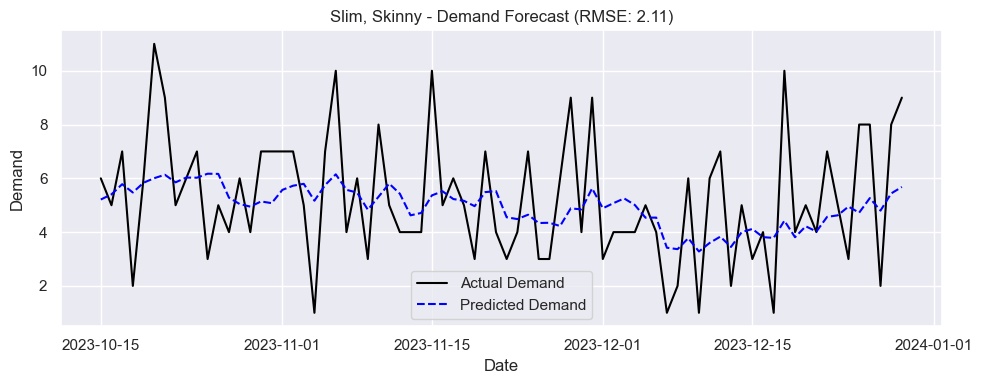

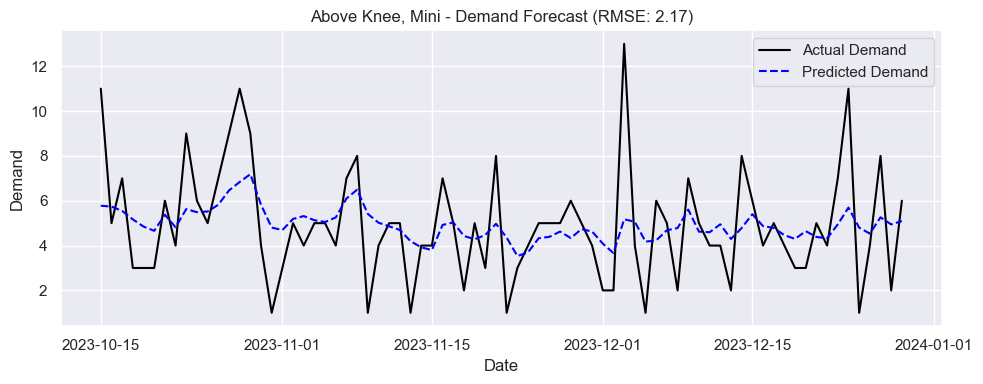

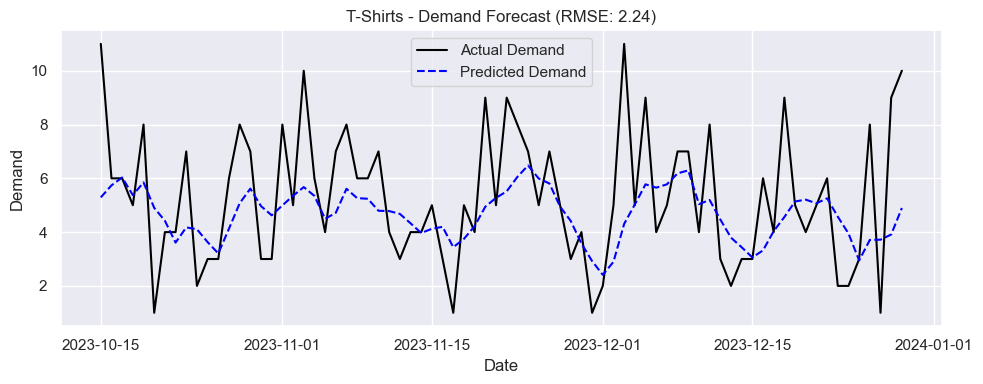

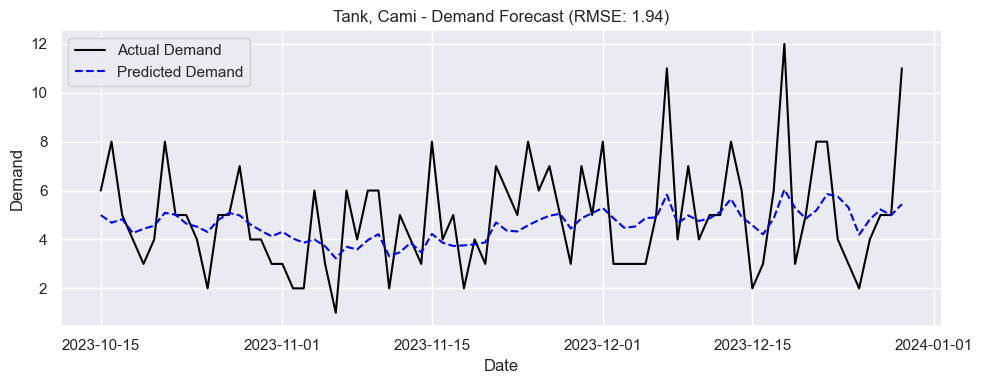

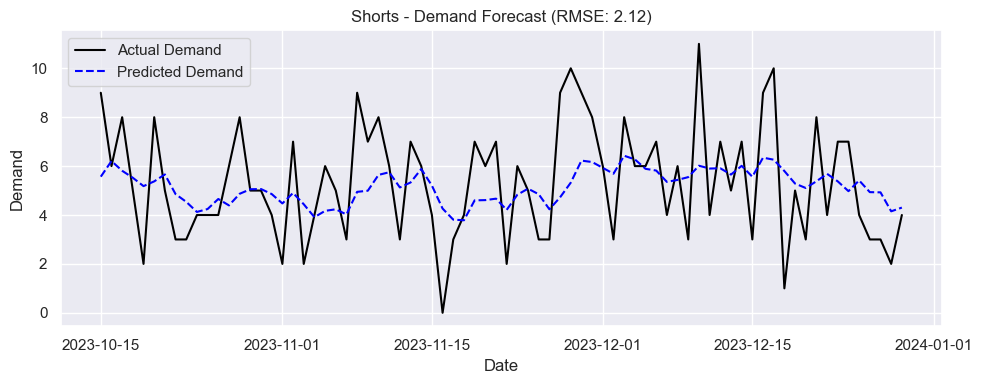

In [44]:
for product in results.keys():
    res = results[product]
    plt.figure(figsize=(10, 4))
    plt.plot(res['dates'], res['actual'], label='Actual Demand', color='black')
    plt.plot(res['dates'], res['pred'], label='Predicted Demand', color='blue', linestyle='--')
    plt.title(f"{product} - Demand Forecast (RMSE: {res['rmse']:.2f})")
    plt.xlabel("Date")
    plt.ylabel("Demand")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
